
<img src="images/utfsm.png" alt="" width="200px" align="right"/>

<br/>

# Taller de Manejo y Visualización de Datos con Python
ScatterText<br/>
Felipe González P.<br/>
felipe.gonzalezp.12@sansano.usm.cl<br/>

<br/>
Jueves Bloque 7-8<br/>
Campus San Joaquín




# spaCy
SpaCy es una biblioteca que tiene funciones para todas las tareas clave de NLP necesarias para preparar el texto para un análisis posterior, incluida la tokenización, el reconocimiento de entidades nombradas y los vectores de palabras, entre muchos otros. Su objetivo es proporcionar un proceso simplificado para que llegue al resultado final lo más rápido posible. No usaremos esto directamente, ya que es aprovechado automáticamente por la biblioteca Scattertext, pero dada su importancia en esta área, vale la pena mencionarlo.

# Scattertext

Scattertext es un paquete de Python que permite comparar y contrastar cómo se usan las palabras de manera diferente en dos tipos de documentos, produciendo visualizaciones interactivas basadas en Javascript que pueden incorporarse fácilmente en los Jupyter Notebooks. Usando SpaCy y Empath, Scattertext también puede mostrar cómo los estados emocionales y las palabras se relacionan con un tema en particular.


<div align="center"><img src="paper.png"></img></div>

<div align="center"><a href="https://arxiv.org/abs/1703.00565">Leer paper aquí</a></div>


<div align="center"><img src="guy.png"></img></div>
<div align="center"><a href="https://github.com/JasonKessler/Scattertext-PyData">Ver repositorio aquí</a></div>

# Instalación 
```bash
conda install -c conda-forge spacy
conda install -c conda-forge scattertext
python -m spacy download en
```

# Importar librerías 

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from datetime import datetime
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Leer dataset
Dataset obtenido desde <a href="https://github.com/PRISMOJI/emojis/blob/master/election_day_tweets_with_emojis_cleaned_VF.csv"> GitHub</a>

In [8]:
data = pd.read_csv("election_day_tweets_with_emojis_cleaned_VF.csv")

In [9]:
data.head(10)

,tweetindex,text,ts,hour,min,lang,source.r,clinton,trump,election,vote,emoji.names,url
0,3,Is Election Day over yet,11/8/16 15:57,15,1557,en,IOS,0,0,1,0,expressionless face,twitter.com/________kenzie/status/796094330494...
1,5,Do people not vote for the Green Party because...,11/8/16 15:22,15,1522,en,WEB,0,0,1,1,thinking face,twitter.com/________owl/status/796085601938313217
2,13,"anyways, I voted",11/8/16 18:09,18,1809,en,IOS,0,0,0,1,hugging face,twitter.com/_______kml/status/796127605422522373
3,15,Mfs Steady Talking Bout The Election How Many ...,11/8/16 16:23,16,1623,en,IOS,0,0,1,1,"face with tears of joy, sleeping face",twitter.com/_______KrewNate/status/79610077736...
4,18,good thing i can't vote,11/8/16 11:12,11,1112,en,IOS,0,0,0,1,"hugging face, Puerto Rico",twitter.com/_______richard/status/796022544570...
5,21,1 vote won't change anything,11/8/16 23:19,23,2319,en,IOS,0,0,0,1,face with rolling eyes,twitter.com/______aMoya/status/796205457979428864
6,22,make sure yall get out and VOTE today!!,11/8/16 6:31,6,631,en,OTHER,0,0,0,1,double exclamation mark,twitter.com/______Ashlee/status/79595176059457...
7,38,This Election Really Show How Fucking Smart Th...,11/8/16 22:15,22,2215,en,IOS,0,0,1,0,expressionless face,twitter.com/______raeeeeee/status/796189489907...
8,49,"This is actually shocking. But then again, hon...",11/8/16 22:32,22,2232,en,IOS,0,0,0,1,face with rolling eyes,twitter.com/_____armani/status/796193747176398849
9,53,My snapchat story/rant about this election is ...,11/8/16 13:32,13,1332,en,IOS,0,0,1,0,"face with tears of joy, United States",twitter.com/_____bat/status/796057835461283840


# Analizar tweets por hora 

In [49]:
import time
def transform_datetime(x):
    try:
        return time.strftime('%y-%m-%d %H:00', time.strptime(x,'%m/%d/%y %H:%M'))
    except:
        pass
data['created_at'] = data.ts.apply(transform_datetime)


In [50]:
data.head()

,tweetindex,text,ts,hour,min,lang,source.r,clinton,trump,election,vote,emoji.names,url,created_at
0,3,Is Election Day over yet,11/8/16 15:57,15,1557,en,IOS,0,0,1,0,expressionless face,twitter.com/________kenzie/status/796094330494...,16-11-08 15:00
1,5,Do people not vote for the Green Party because...,11/8/16 15:22,15,1522,en,WEB,0,0,1,1,thinking face,twitter.com/________owl/status/796085601938313217,16-11-08 15:00
2,13,"anyways, I voted",11/8/16 18:09,18,1809,en,IOS,0,0,0,1,hugging face,twitter.com/_______kml/status/796127605422522373,16-11-08 18:00
3,15,Mfs Steady Talking Bout The Election How Many ...,11/8/16 16:23,16,1623,en,IOS,0,0,1,1,"face with tears of joy, sleeping face",twitter.com/_______KrewNate/status/79610077736...,16-11-08 16:00
4,18,good thing i can't vote,11/8/16 11:12,11,1112,en,IOS,0,0,0,1,"hugging face, Puerto Rico",twitter.com/_______richard/status/796022544570...,16-11-08 11:00


# Cantidad del dataset 

In [51]:
len(data)

175655

# Categorizemos los tweets

In [52]:
data_clinton = data[data['clinton']==1]
data_trump = data[data['trump']==1]

¿Cuántos escriben tweets sobre Clinton? ¿Cuántos sobre Trump?

# Veamos los tweets en el tiempo

In [53]:
tweets_over_time_clinton = data_clinton.groupby('created_at').size()
tweets_over_time_trump = data_trump.groupby('created_at').size()


In [54]:
tweets_over_time_clinton

created_at
16-11-08 01:00     421
16-11-08 02:00     758
16-11-08 03:00     743
16-11-08 04:00     545
16-11-08 05:00     631
16-11-08 06:00     861
16-11-08 07:00    1349
16-11-08 08:00    1743
16-11-08 09:00    1827
16-11-08 10:00    1799
16-11-08 11:00    1736
16-11-08 12:00    1608
16-11-08 13:00    1472
16-11-08 14:00    1438
16-11-08 15:00    1467
16-11-08 16:00    1064
16-11-08 17:00    1079
16-11-08 18:00    1121
16-11-08 19:00    1311
16-11-08 20:00    1500
16-11-08 21:00    1166
16-11-08 22:00    1021
16-11-08 23:00     898
16-11-09 00:00     685
16-11-09 01:00     735
16-11-09 02:00    1016
16-11-09 03:00     466
dtype: int64

# Grafiquemos 

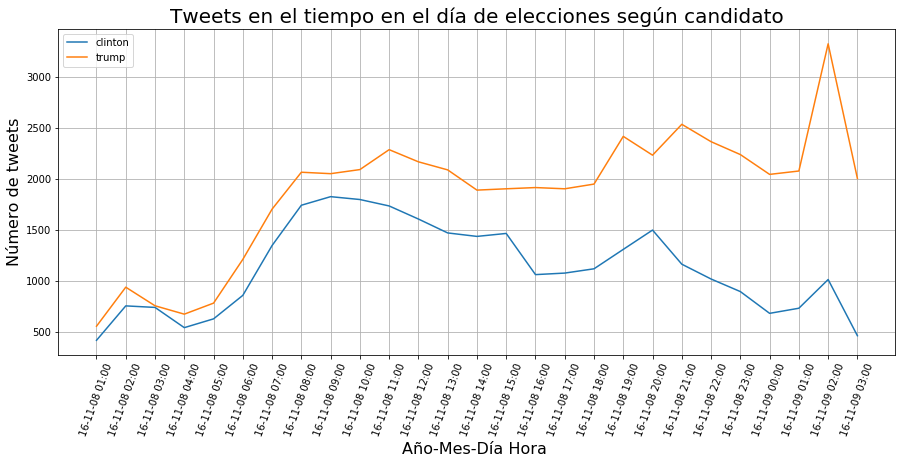

In [58]:
plt.figure(figsize=(15,6))
plt.title("Tweets en el tiempo en el día de elecciones según candidato", fontsize=20)

plt.plot(tweets_over_time_clinton, label="clinton")
plt.plot(tweets_over_time_trump, label="trump")


plt.ylabel('Número de tweets', fontsize=16)
plt.xlabel("Año-Mes-Día Hora ", fontsize=16)
plt.legend()
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

<div align="center"><h1> Usemos ScatterText </h1></div>

## Cargaremos un modelo, este contiene vocabulario, entidades y sintáxis propia del idioma. No lo usaremos directamente

In [59]:
nlp = spacy.load('en')

## Crearemos una nueva columna en los dos dataframe creados

In [61]:
data_clinton['category'] = 'clinton'
data_trump['category'] = 'trump'


## Uniremos todo

In [62]:
data_night_election = pd.concat([data_clinton[['category','url','text']],  data_trump[['category','url','text']]])


# Alerta

Si correrá los siguientes códigos, debe tener cuenta que tomará tiempo obtener el resultado. Es recomendable hacer un sample. 

# Corpus 

Un corpus lingüístico es un conjunto amplio y estructurado de ejemplos reales de uso de la lengua. Estos ejemplos pueden ser textos, o muestras orales


# Crearemos un corpus a partir de un dataframe


In [35]:
start_time = datetime.now() 
corpus_data_night_election = st.CorpusFromPandas(data_night_election,category_col='category', text_col='text', nlp=nlp).build() 
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:17:39.146936


# Veamos términos frecuentes en la noche de elecciones

In [40]:
mininum = 500
html_group_4_english = st.produce_scattertext_explorer(corpus_data_night_election, category='clinton',         
                                       category_name='Clinton',          
                                       not_category_name='Trump',
                                       minimum_term_frequency = mininum,
                                       width_in_pixels=1000,          
                                       metadata=data_night_election['url'])
open("Night_elections.html", 'wb').write(html_group_4_english.encode('utf-8'))


12907510

# Hagamos Topic Modeling

In [42]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpush = st.CorpusFromParsedDocuments(data_night_election,
                                             category_col='category',
                                             feats_from_spacy_doc=feat_builder,
                                             parsed_col='text').build()


In [46]:
html = st.produce_scattertext_explorer(empath_corpush,
...                                        category='clinton',
...                                        category_name='Clinton',
...                                        not_category_name='Trump',
...                                        width_in_pixels=1000,
...                                        metadata=data_night_election['url'],
...                                        use_non_text_features=True,
...                                        use_full_doc=True,
...                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("Topic-Night-Elections.html", 'wb').write(html.encode('utf-8'))

16687660